In [ ]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import time
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
drive.mount("/content/MyDrive/")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
place_id_list = ["30","35","36","42","43","44","45","46","47","48","50","51","54","55"]
place_name_list = ["門別","盛岡","水沢","浦和","船橋","大井","川崎","金沢","笠松","名古屋","園田","姫路","高知","佐賀"]

place_id_list2 = [int(id) for id in place_id_list]

col_names = ["arrival_order", "frame_id", "umaban_id", "horse_name", "sex_age", "kinryo_weight",
                      "jockey", "arrival_time", "arrival_diff", "tansho", "popularity", "horse_weight", "trainer"]

In [ ]:
for place in place_id_list2:
  start = time.time()
  horse_all_df = pd.DataFrame()
  result_all_df = pd.DataFrame()
  time_all_df = pd.DataFrame()
  race_info_df = pd.DataFrame(columns = ["race_info", "race_info2"])
  for year in [2017]:
    for month in range(1, 13):
      for day in range(1, 32):
        for race in range(1, 13):
          url = "https://db.netkeiba.com/race/{year}{place}{month}{day}{race}/".format(year = str(year), place = str(place), month = str(month).zfill(2), day = str(day).zfill(2), race = str(race).zfill(2))
          try:
            response = requests.get(url)
            response.encoding = "EUC-JP"
            tab = pd.read_html(response.text)

            # horse info
            horse_df = tab[0]
            horse_df.columns = col_names
            horse_df["year"] = year
            horse_df["month"] = month
            horse_df["day"] = day
            horse_df["place"] = place

            horse_df["race_id"] = race


            soup = BeautifulSoup(response.content)
            horse_a_list = soup.find("table", attrs={"summary": "レース結果"}).find_all(
                                "a", attrs={"href": re.compile("^/horse")}
                            )
            horse_df["horse_id"] = [a_text.get('href').split("/")[-2] for a_text in horse_a_list]

            jockey_a_list = soup.find("table", attrs={"summary": "レース結果"}).find_all(
                                "a", attrs={"href": re.compile("^/jockey")}
                            )
            horse_df["jockey_id"] = [a_text.get('href').split("/")[-2] for a_text in jockey_a_list]

            # mid order
            order_list = [re.sub('[^0-9|,]','', re.sub('-|=',',', order)) for order in pd.read_html(response.text, decimal=',', thousands='.')[4][1].values]
            for corner_i in range(0, 4):
              try:
                order = list(map(int, order_list[corner_i].split(',')))
                horse_df["mid_order_{}".format(str(corner_i + 1))] = horse_df['umaban_id'].map({horse_id: order for order, horse_id in enumerate(order, 1)})
              except:
                pass
            horse_all_df = horse_all_df.append(horse_df, ignore_index = True)

            # results
            result_df = pd.concat([tab[1], tab[2]]).reset_index(drop = True)
            result_df.columns = ["bet_type", "order", "payment", "popularity"]
            result_df["year"] = year
            result_df["month"] = month
            result_df["day"] = day
            result_df["place"] = place
            result_df["race_id"] = race
            result_all_df = result_all_df.append(result_df, ignore_index = True)


            # race info

            race_info = soup.findAll("diary_snap_cut")[0].text
            race_info2 = soup.find("p", class_ = "smalltxt").text
            race_info_df = race_info_df.append({"race_info":race_info, "race_info2":race_info2}, ignore_index = True)

            # mid time
            time_df = pd.read_html(response.text, decimal=',', thousands='.')[4]
            time_df.columns = ["course", "mid_order"]
            time_df["year"] = year
            time_df["month"] = month
            time_df["day"] = day
            time_df["place"] = place
            time_df["race_id"] = race
            time_all_df = time_all_df.append(time_df, ignore_index = True)


            time.sleep(0.5)
          except:
            pass
  horse_all_df.to_csv("/content/MyDrive/MyDrive/horse/data/src/{}/horse_info_{}.csv".format(year, place), index = False, encoding = "utf-8")
  result_all_df.to_csv("/content/MyDrive/MyDrive/horse/data/src/{}/result_{}.csv".format(year, place), index = False, encoding = "utf-8")
  race_info_df.to_csv("/content/MyDrive/MyDrive/horse/data/src/{}/race_info_{}.csv".format(year, place), index = False, encoding = "utf-8")
  time_all_df.to_csv("/content/MyDrive/MyDrive/horse/data/src/{}/mid_time_{}.csv".format(year, place), index = False, encoding = "utf-8")
  print(place)
  end = time.time()
  print((end - start) / 60)

OSError: Cannot save file into a non-existent directory: '/content/MyDrive/MyDrive/horse/data/src/2017'

In [ ]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import time
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
drive.mount("/content/MyDrive/")

Mounted at /content/MyDrive/


In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=effe076ad0cb42c7812148eb5c297e5d143f1880e9f6b1ad0ea76fe33453068e
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
!apt -qy install fonts-noto-cjk
!pip install -q --upgrade matplotlib


Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 4s (17.2 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take i

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']


import networkx as nx

In [ ]:
df = pd.read_parquet("/content/MyDrive/MyDrive/horse/data/dev/horse_name.parquet")

In [ ]:
family_all_df = pd.DataFrame()
for horse_name, horse_id in df[["horse_name", "horse_id"]].iterrows():
  try:
    horse_name = horse_id["horse_name"]
    horse_id = horse_id["horse_id"]
    url = "https://db.netkeiba.com/horse/ped/{}/".format(horse_id)
    family_df = pd.read_html(url)[0]
    family_df.columns = ["parent_1", "parent_2", "parent_3", "parent_4", "parent_5"]
    for i in range(1, 6):
      family_df["parent_{}".format(i)] = family_df["parent_{}".format(i)].str.replace(" \[血統\]\[産駒\]", "")
    family_df["horse_name"] = horse_name
    family_df["horse_id"] = horse_id
    family_all_df = family_all_df.append(family_df, ignore_index=True)
    time.sleep(0.5)
  except:
    pass
family_all_df = family_all_df[["horse_name", "horse_id", "parent_1", "parent_2", "parent_3", "parent_4", "parent_5"]]

In [ ]:
family_all_df.to_parquet("/content/MyDrive/MyDrive/horse/data/dev/horse_ped.parquet")

In [ ]:
col_list = ["horse_name", "parent_1", "parent_2", "parent_3", "parent_4", "parent_5"]


family_link_df = pd.DataFrame()
for i in range(len(col_list)-1):
  family_link_df = family_link_df.append(family_all_df.rename(columns = {col_list[i] : "child", col_list[i+1] : "parent"})[["child", "parent"]].drop_duplicates(), ignore_index = True)
  family_link_df.drop_duplicates(subset = ["child", "parent"], inplace = True)
family_link_df.drop_duplicates(subset = ["child", "parent"], inplace = True)
family_link_df["child"] = family_link_df["child"].str.split("[1-9]").str[0]
family_link_df["parent"] = family_link_df["parent"].str.split("[1-9]").str[0]

In [ ]:
family_link_df.to_parquet("/content/MyDrive/MyDrive/horse/data/dev/horse_family_link.parquet")

In [ ]:
pd.read_parquet("/content/MyDrive/MyDrive/horse/data/dev/horse_ped.parquet")

horse_name    horse_id                        parent_1  \
0           クラウォー  2018100279  シビルウォー 2005 鹿毛 Raise a Native系   
1           クラウォー  2018100279  シビルウォー 2005 鹿毛 Raise a Native系   
2           クラウォー  2018100279  シビルウォー 2005 鹿毛 Raise a Native系   
3           クラウォー  2018100279  シビルウォー 2005 鹿毛 Raise a Native系   
4           クラウォー  2018100279  シビルウォー 2005 鹿毛 Raise a Native系   
...           ...         ...                             ...   
732955    コスモアバンサ  2020101337          ヨウヨウ 2002 栗毛 FNo.[6-a]   
732956    コスモアバンサ  2020101337          ヨウヨウ 2002 栗毛 FNo.[6-a]   
732957    コスモアバンサ  2020101337          ヨウヨウ 2002 栗毛 FNo.[6-a]   
732958    コスモアバンサ  2020101337          ヨウヨウ 2002 栗毛 FNo.[6-a]   
732959    コスモアバンサ  2020101337          ヨウヨウ 2002 栗毛 FNo.[6-a]   

                               parent_2                      parent_3  \
0       ウォーエンブレム War Emblem(米) 1999 青鹿毛           Our Emblem 1991 黒鹿毛   
1       ウォーエンブレム War Emblem(米) 1999 青鹿毛           Our Emblem 1991 黒鹿毛   
2       ウォーエンブレム War Emblem(米) 1999 青鹿毛           Our Emblem 1991 黒鹿毛   
3       ウォーエンブレム War Emblem(米) 1999 青鹿毛           Our Emblem 1991 黒鹿毛   
4       ウォーエンブレム War Emblem(米) 1999 青鹿毛         Sweetest Lady 1990 鹿毛   
...                                 ...                           ...   
732955                  フィジーガール 1996 鹿毛  カコイーシーズ Cacoethes(米) 1986 鹿毛   
732956                  フィジーガール 1996 鹿毛                 ツバキヒメ 1984 鹿毛   
732957                  フィジーガール 1996 鹿毛                 ツバキヒメ 1984 鹿毛   
732958                  フィジーガール 1996 鹿毛                 ツバキヒメ 1984 鹿毛   
732959                  フィジーガール 1996 鹿毛                 ツバキヒメ 1984 鹿毛   

                       parent_4         parent_5  
0        Mr. Prospector 1970 鹿毛   Raise a Native  
1        Mr. Prospector 1970 鹿毛      Gold Digger  
2       Personal Ensign 1984 鹿毛  Private Account  
3       Personal Ensign 1984 鹿毛   Grecian Banner  
4           Lord at War 1980 栗毛          General  
...                         ...              ...  
732955  Careless Notion 1970 鹿毛      Miss Uppity  
732956          マルゼンスキー 1974 鹿毛         Nijinsky  
732957          マルゼンスキー 1974 鹿毛               シル  
732958             ヒルガオ 1976 鹿毛          スティンティノ  
732959             ヒルガオ 1976 鹿毛           ロージズデー  

[732960 rows x 7 columns]

In [ ]:
df = pd.read_parquet("/content/MyDrive/MyDrive/horse/data/dev/horse_race_info_cleaned_all2.parquet")

In [ ]:
dname_samples = family_all_df.drop_duplicates(subset = ["horse_name"])["horse_name"].sample(axis = 0, n = 1, random_state = 1234).values

In [ ]:
col_list = ["horse_name", "parent_1", "parent_2", "parent_3", "parent_4"]

family_all_df2 = family_all_df[family_all_df["horse_name"].isin(name_samples)]

family_link_df = pd.DataFrame()
for i in range(len(col_list)-1):
  family_link_df = family_link_df.append(family_all_df2.rename(columns = {col_list[i] : "child", col_list[i+1] : "parent"})[["child", "parent"]].drop_duplicates(), ignore_index = True)

family_link_df.drop_duplicates(subset = ["child", "parent"], inplace = True)
family_link_df["child"] = family_link_df["child"].str.split("[1-9]").str[0]
family_link_df["parent"] = family_link_df["parent"].str.split("[1-9]").str[0]

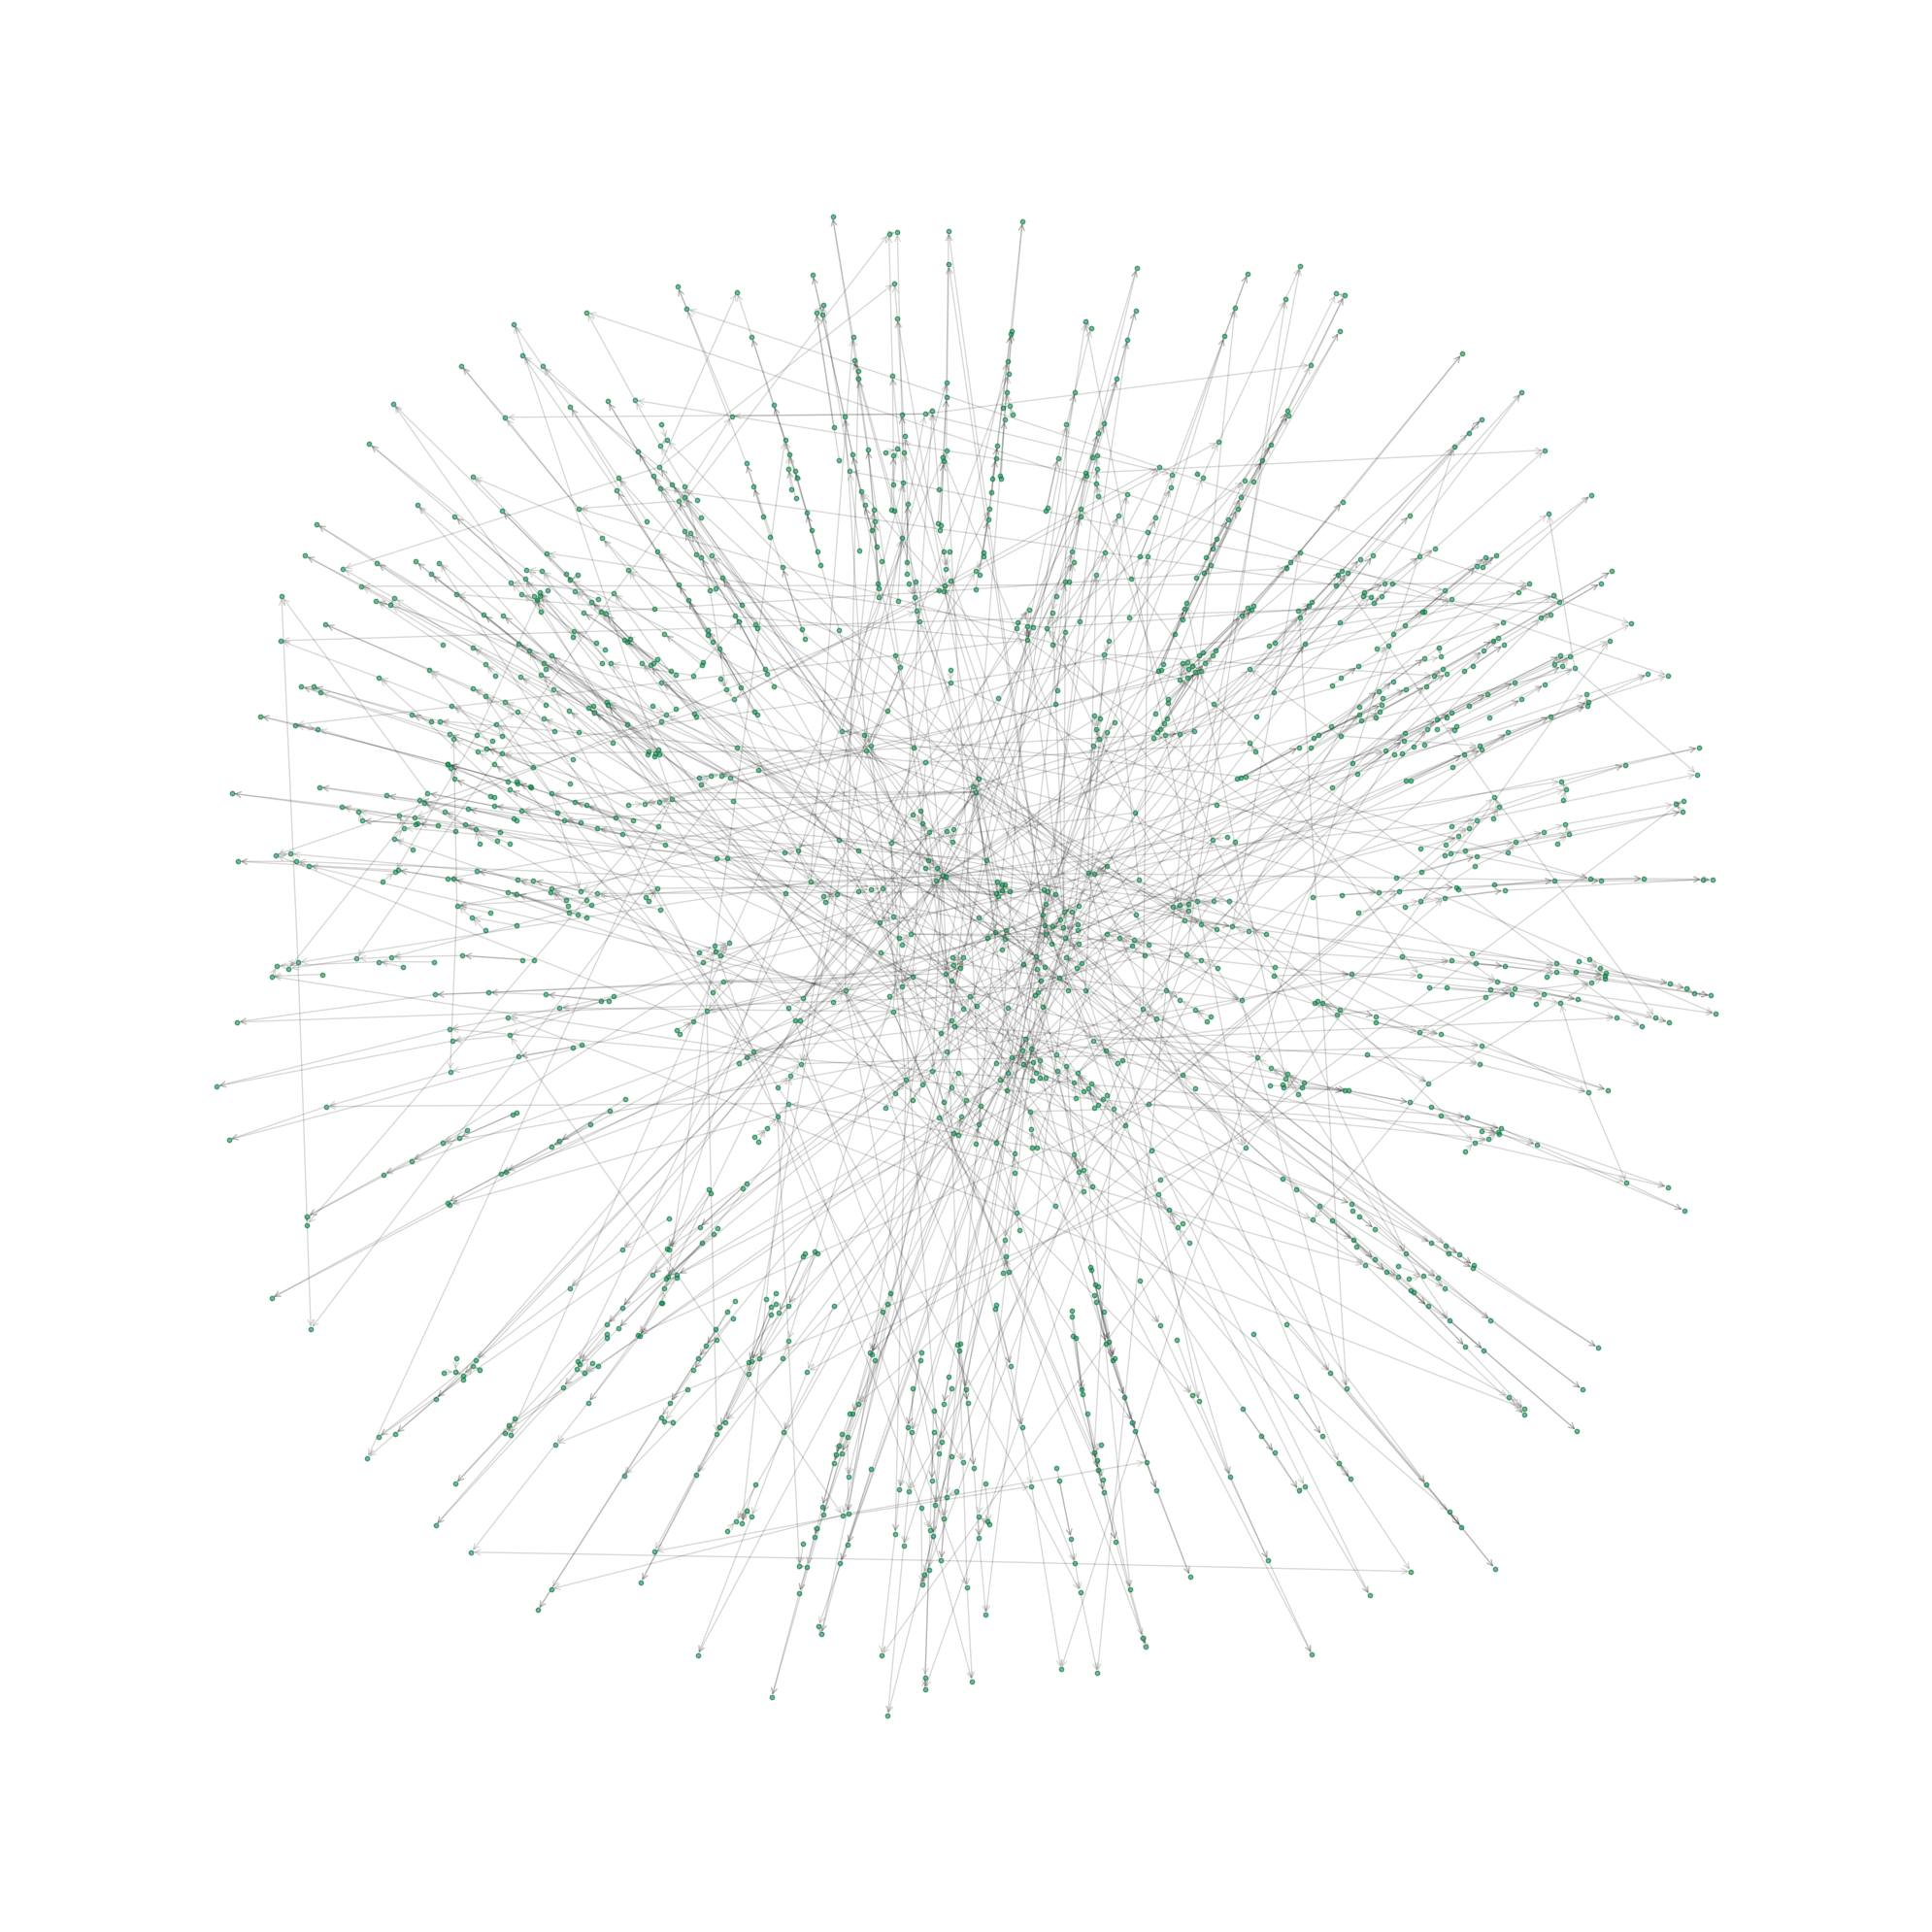

In [ ]:
# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, edgecolors = "green", alpha = 0.6)

# edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", node_size = 10, arrowsize = 10, alpha = 0.15)  # using a 10x scale factor here

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.tight_layout()
plt.savefig("sample2.svg", format='svg', dpi=1200)

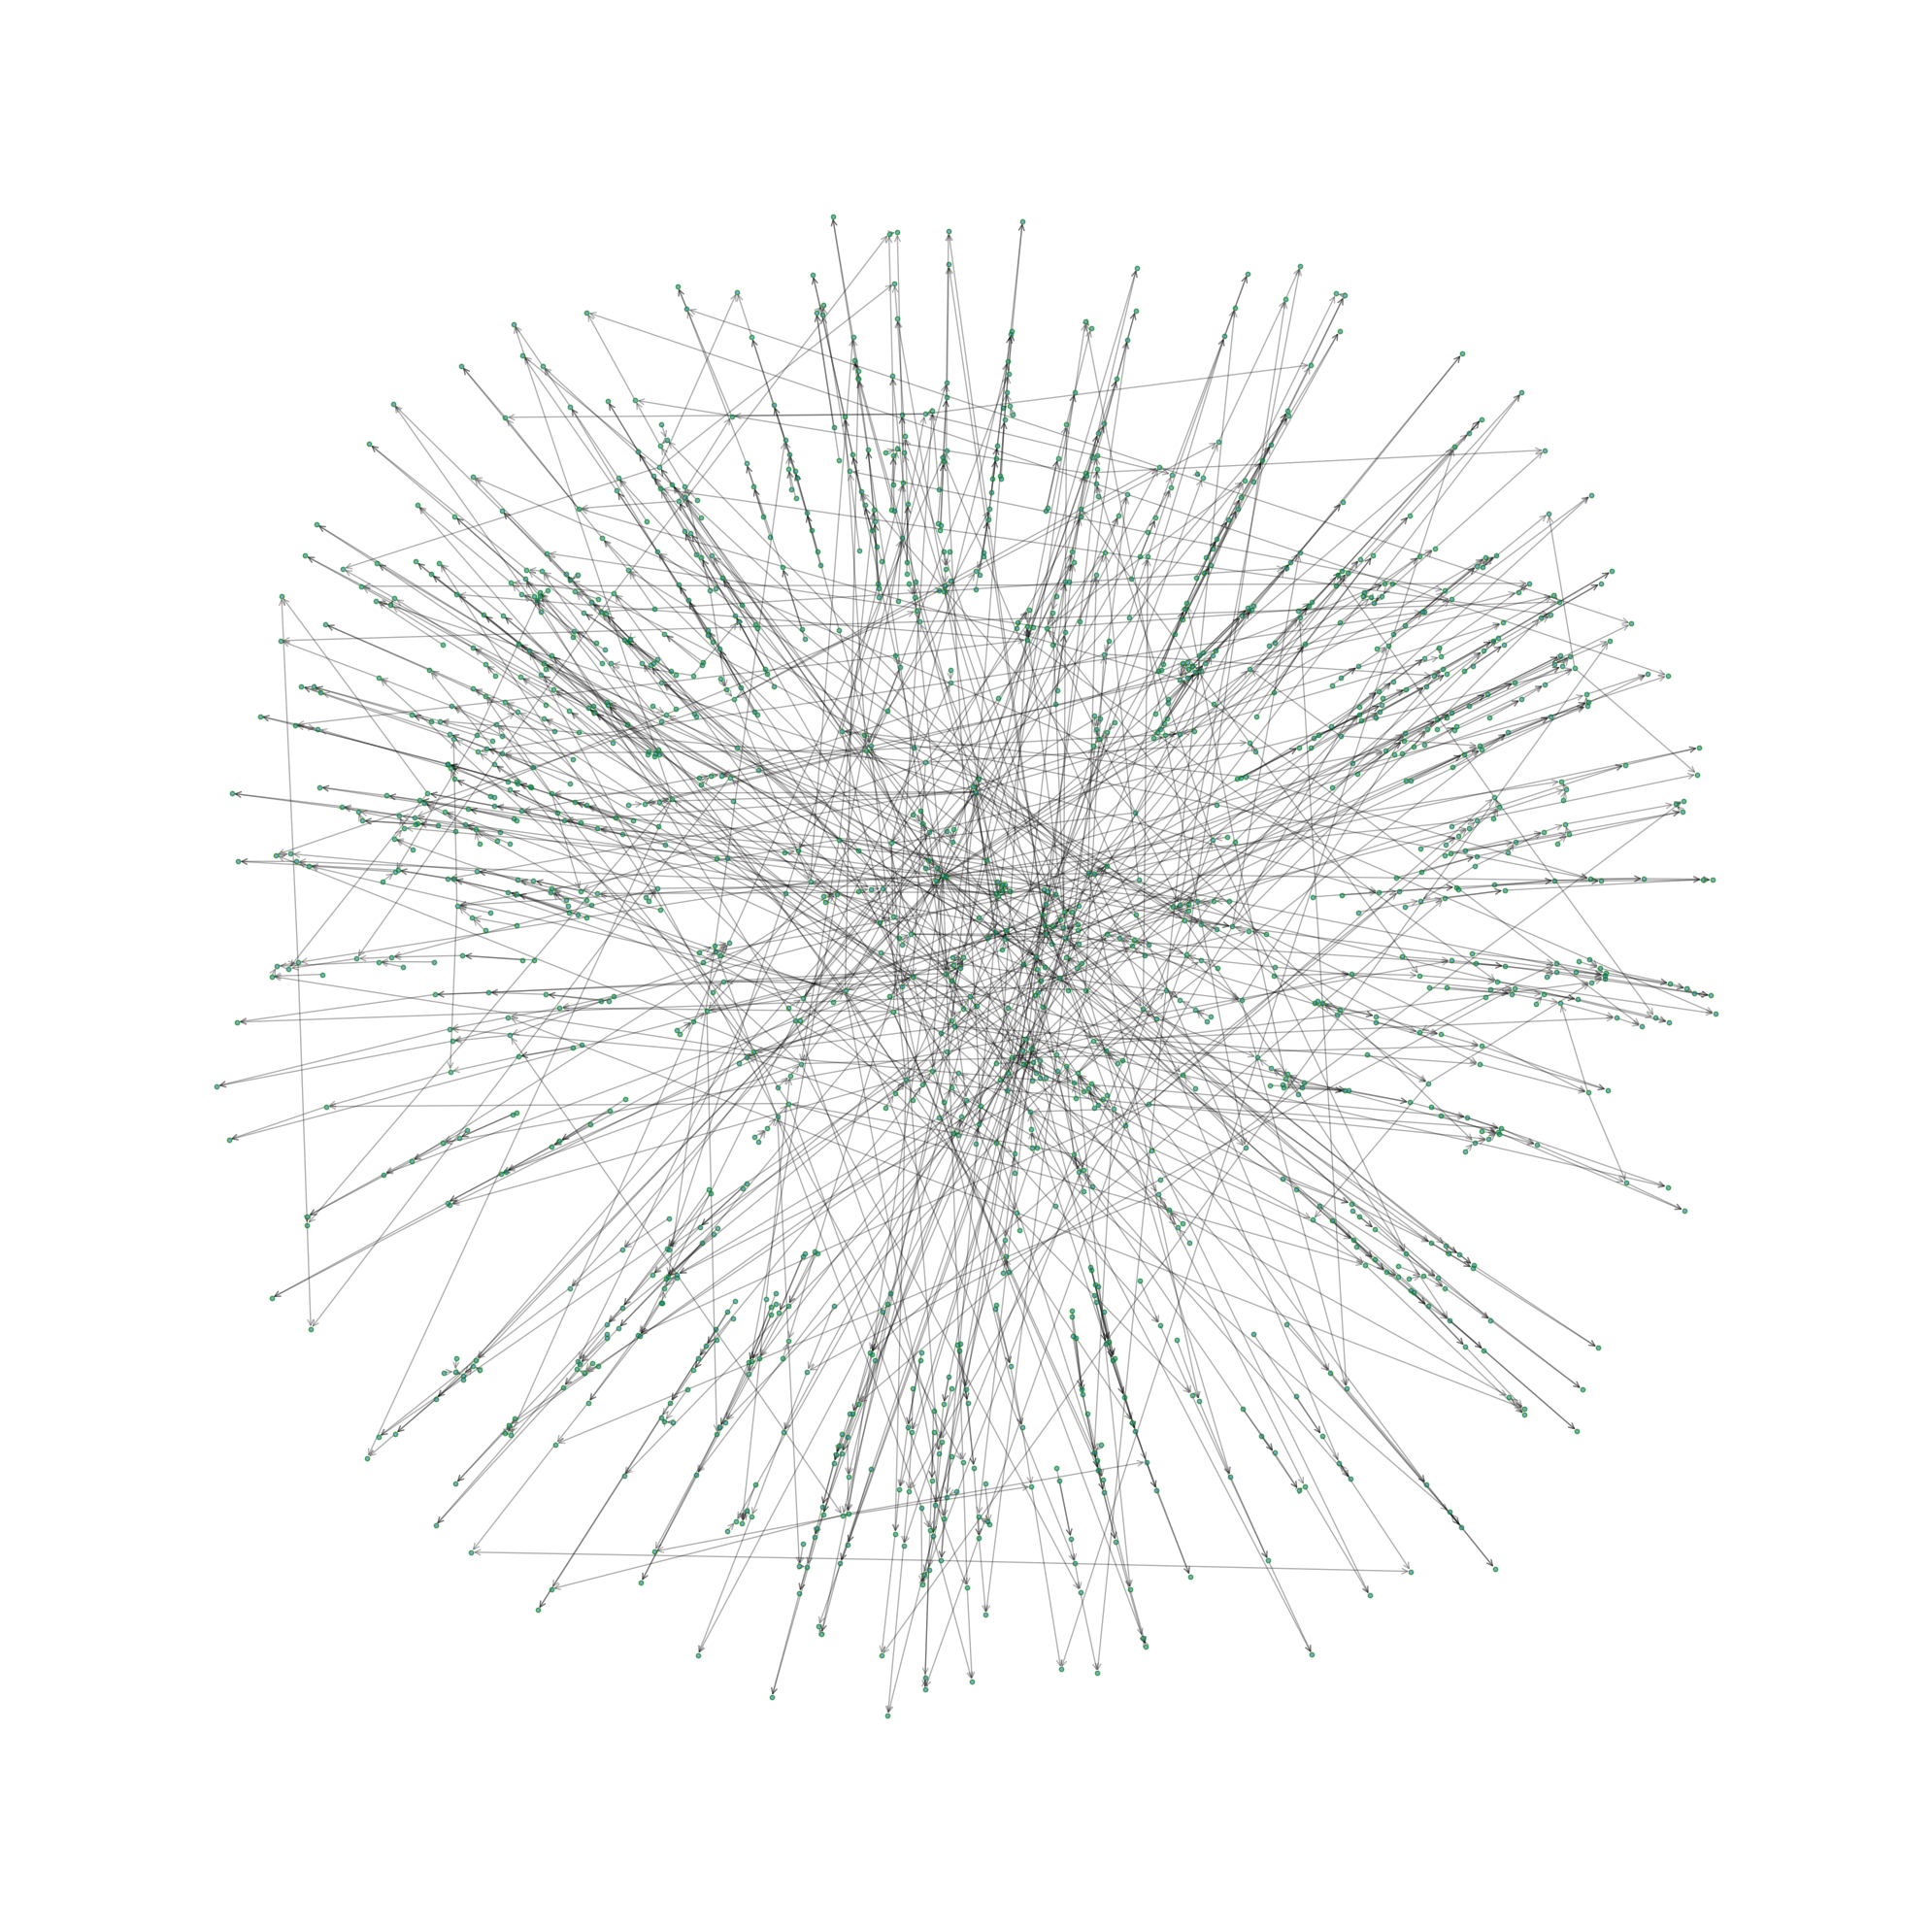

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]

G = nx.from_pandas_edgelist(family_link_df, source = "parent", target = "child", create_using = nx.DiGraph())
seed = 1234
pos = nx.spring_layout(G, seed=seed)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, edgecolors = "green", alpha = 0.6)

# edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", node_size = 10, arrowsize = 10, alpha = 0.3)  # using a 10x scale factor here

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.savefig("sample2.svg", format='svg', dpi=1200)
plt.tight_layout()

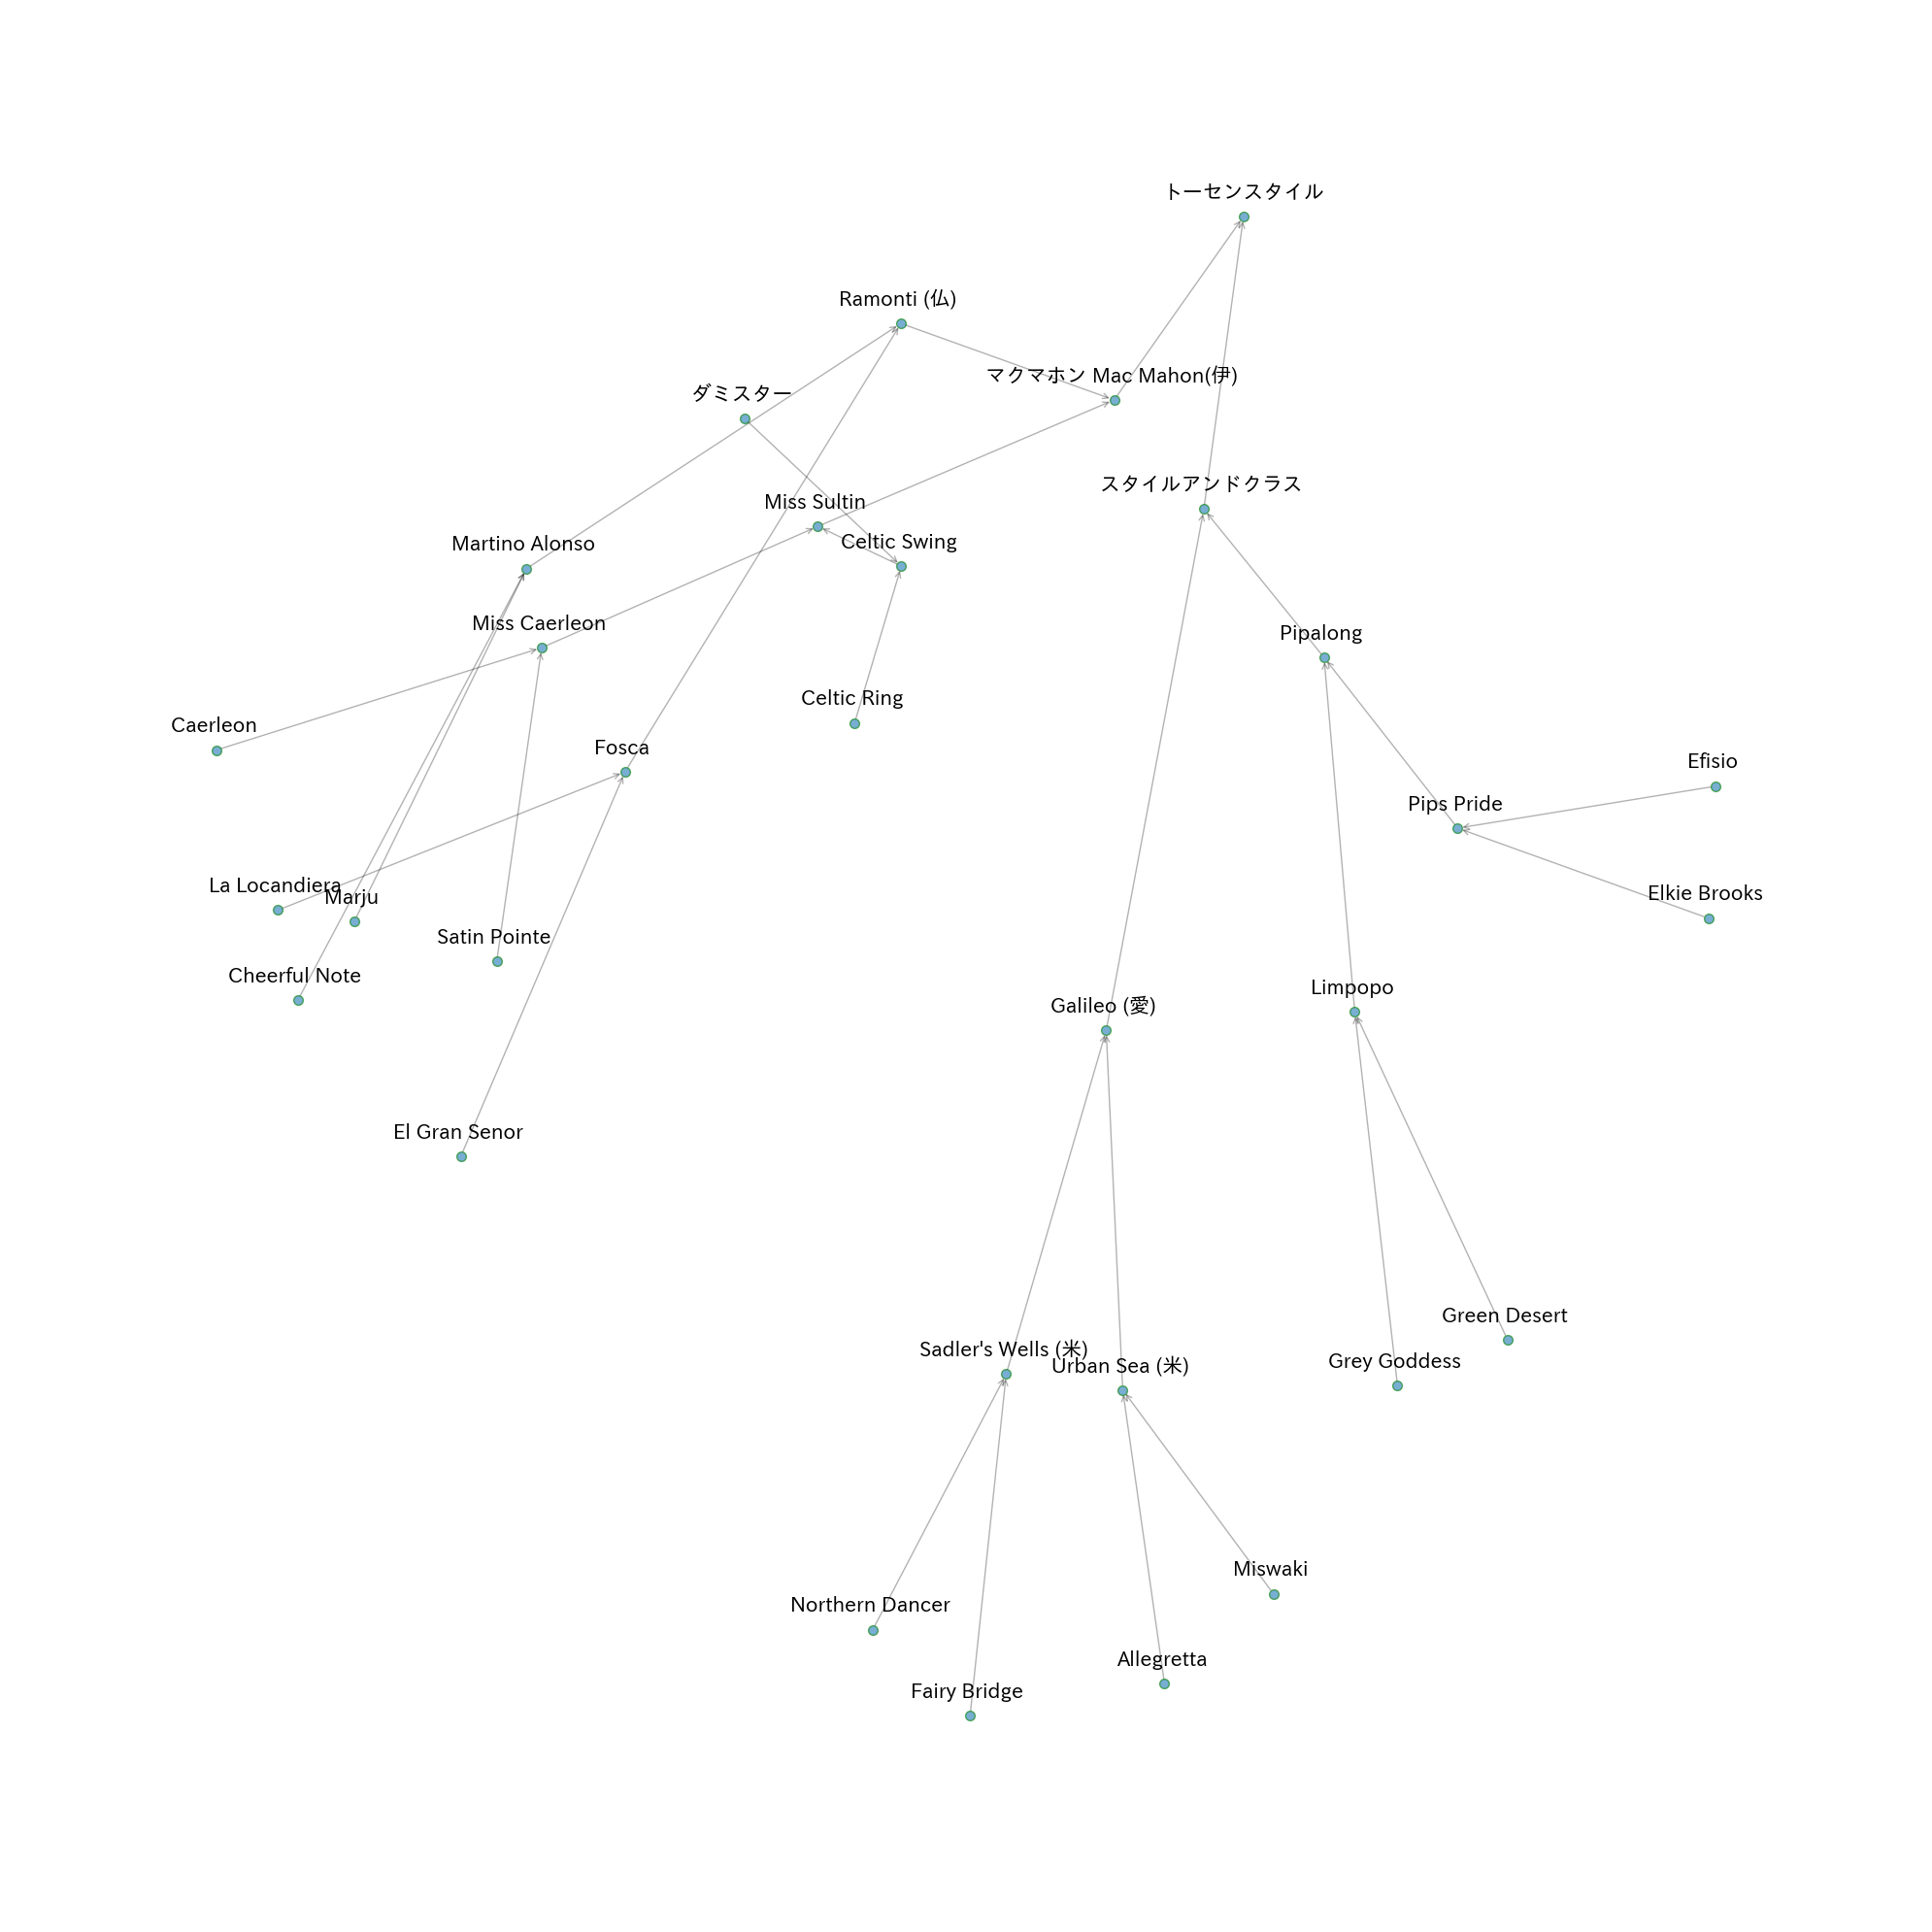

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]

G = nx.from_pandas_edgelist(family_link_df, source = "parent", target = "child", create_using = nx.DiGraph())
seed = 1234
pos = nx.spring_layout(G, seed=seed)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=50, edgecolors = "green", alpha = 0.6)

# edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", node_size = 50, arrowsize = 10, alpha = 0.3)  # using a 10x scale factor here

# labels
pos_higher = {}
y_off = 0.03  # offset on the y axis

for k, v in pos.items():
  pos_higher[k] = (v[0], v[1]+y_off)

nx.draw_networkx_labels(G, pos_higher, font_size=15)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.savefig("sample2.svg", format='svg', dpi=1200)
plt.tight_layout()

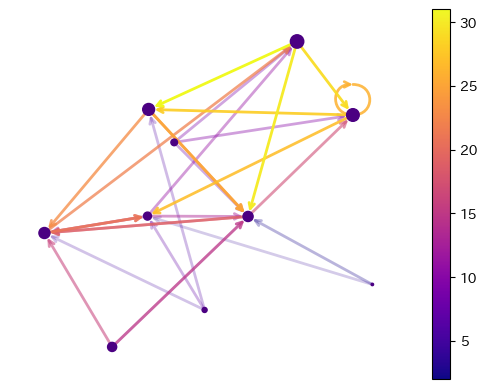

In [ ]:
seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

In [ ]:
len(horse_id_list) * 32

63040

In [ ]:
url

'https://db.netkeiba.com/horse/ped/2016104701/'

In [ ]:
response = requests.get(url)
response.encoding = "EUC-JP"

In [ ]:
soup = BeautifulSoup(response.content)
horse_a_list = soup.find("table").find_all(
                  "a", attrs={"href": re.compile("^/horse")}
              )

# Wabisuke

In [ ]:
url = "https://db.netkeiba.com/horse/ped/2020103158/"

In [ ]:
family_all_df = pd.DataFrame()

horse_name = "Wabisuke"
horse_id = "2020103158"

family_df = pd.read_html(url)[0]
family_df.columns = ["parent_1", "parent_2", "parent_3", "parent_4", "parent_5"]
for i in range(1, 6):
  family_df["parent_{}".format(i)] = family_df["parent_{}".format(i)].str.replace(" \[血統\]\[産駒\]", "")
family_df["horse_name"] = horse_name
family_df["horse_id"] = horse_id
family_all_df = family_all_df.append(family_df, ignore_index=True)
time.sleep(0.5)
family_all_df = family_all_df[["horse_name", "horse_id", "parent_1", "parent_2", "parent_3", "parent_4", "parent_5"]]

In [ ]:
col_list = ["horse_name", "parent_1", "parent_2", "parent_3", "parent_4"]

family_all_df2 = family_all_df

family_link_df = pd.DataFrame()
for i in range(len(col_list)-1):
  family_link_df = family_link_df.append(family_all_df2.rename(columns = {col_list[i] : "child", col_list[i+1] : "parent"})[["child", "parent"]].drop_duplicates(), ignore_index = True)

family_link_df.drop_duplicates(subset = ["child", "parent"], inplace = True)
family_link_df["child"] = family_link_df["child"].str.split("[1-9]").str[0]
family_link_df["parent"] = family_link_df["parent"].str.split("[1-9]").str[0]

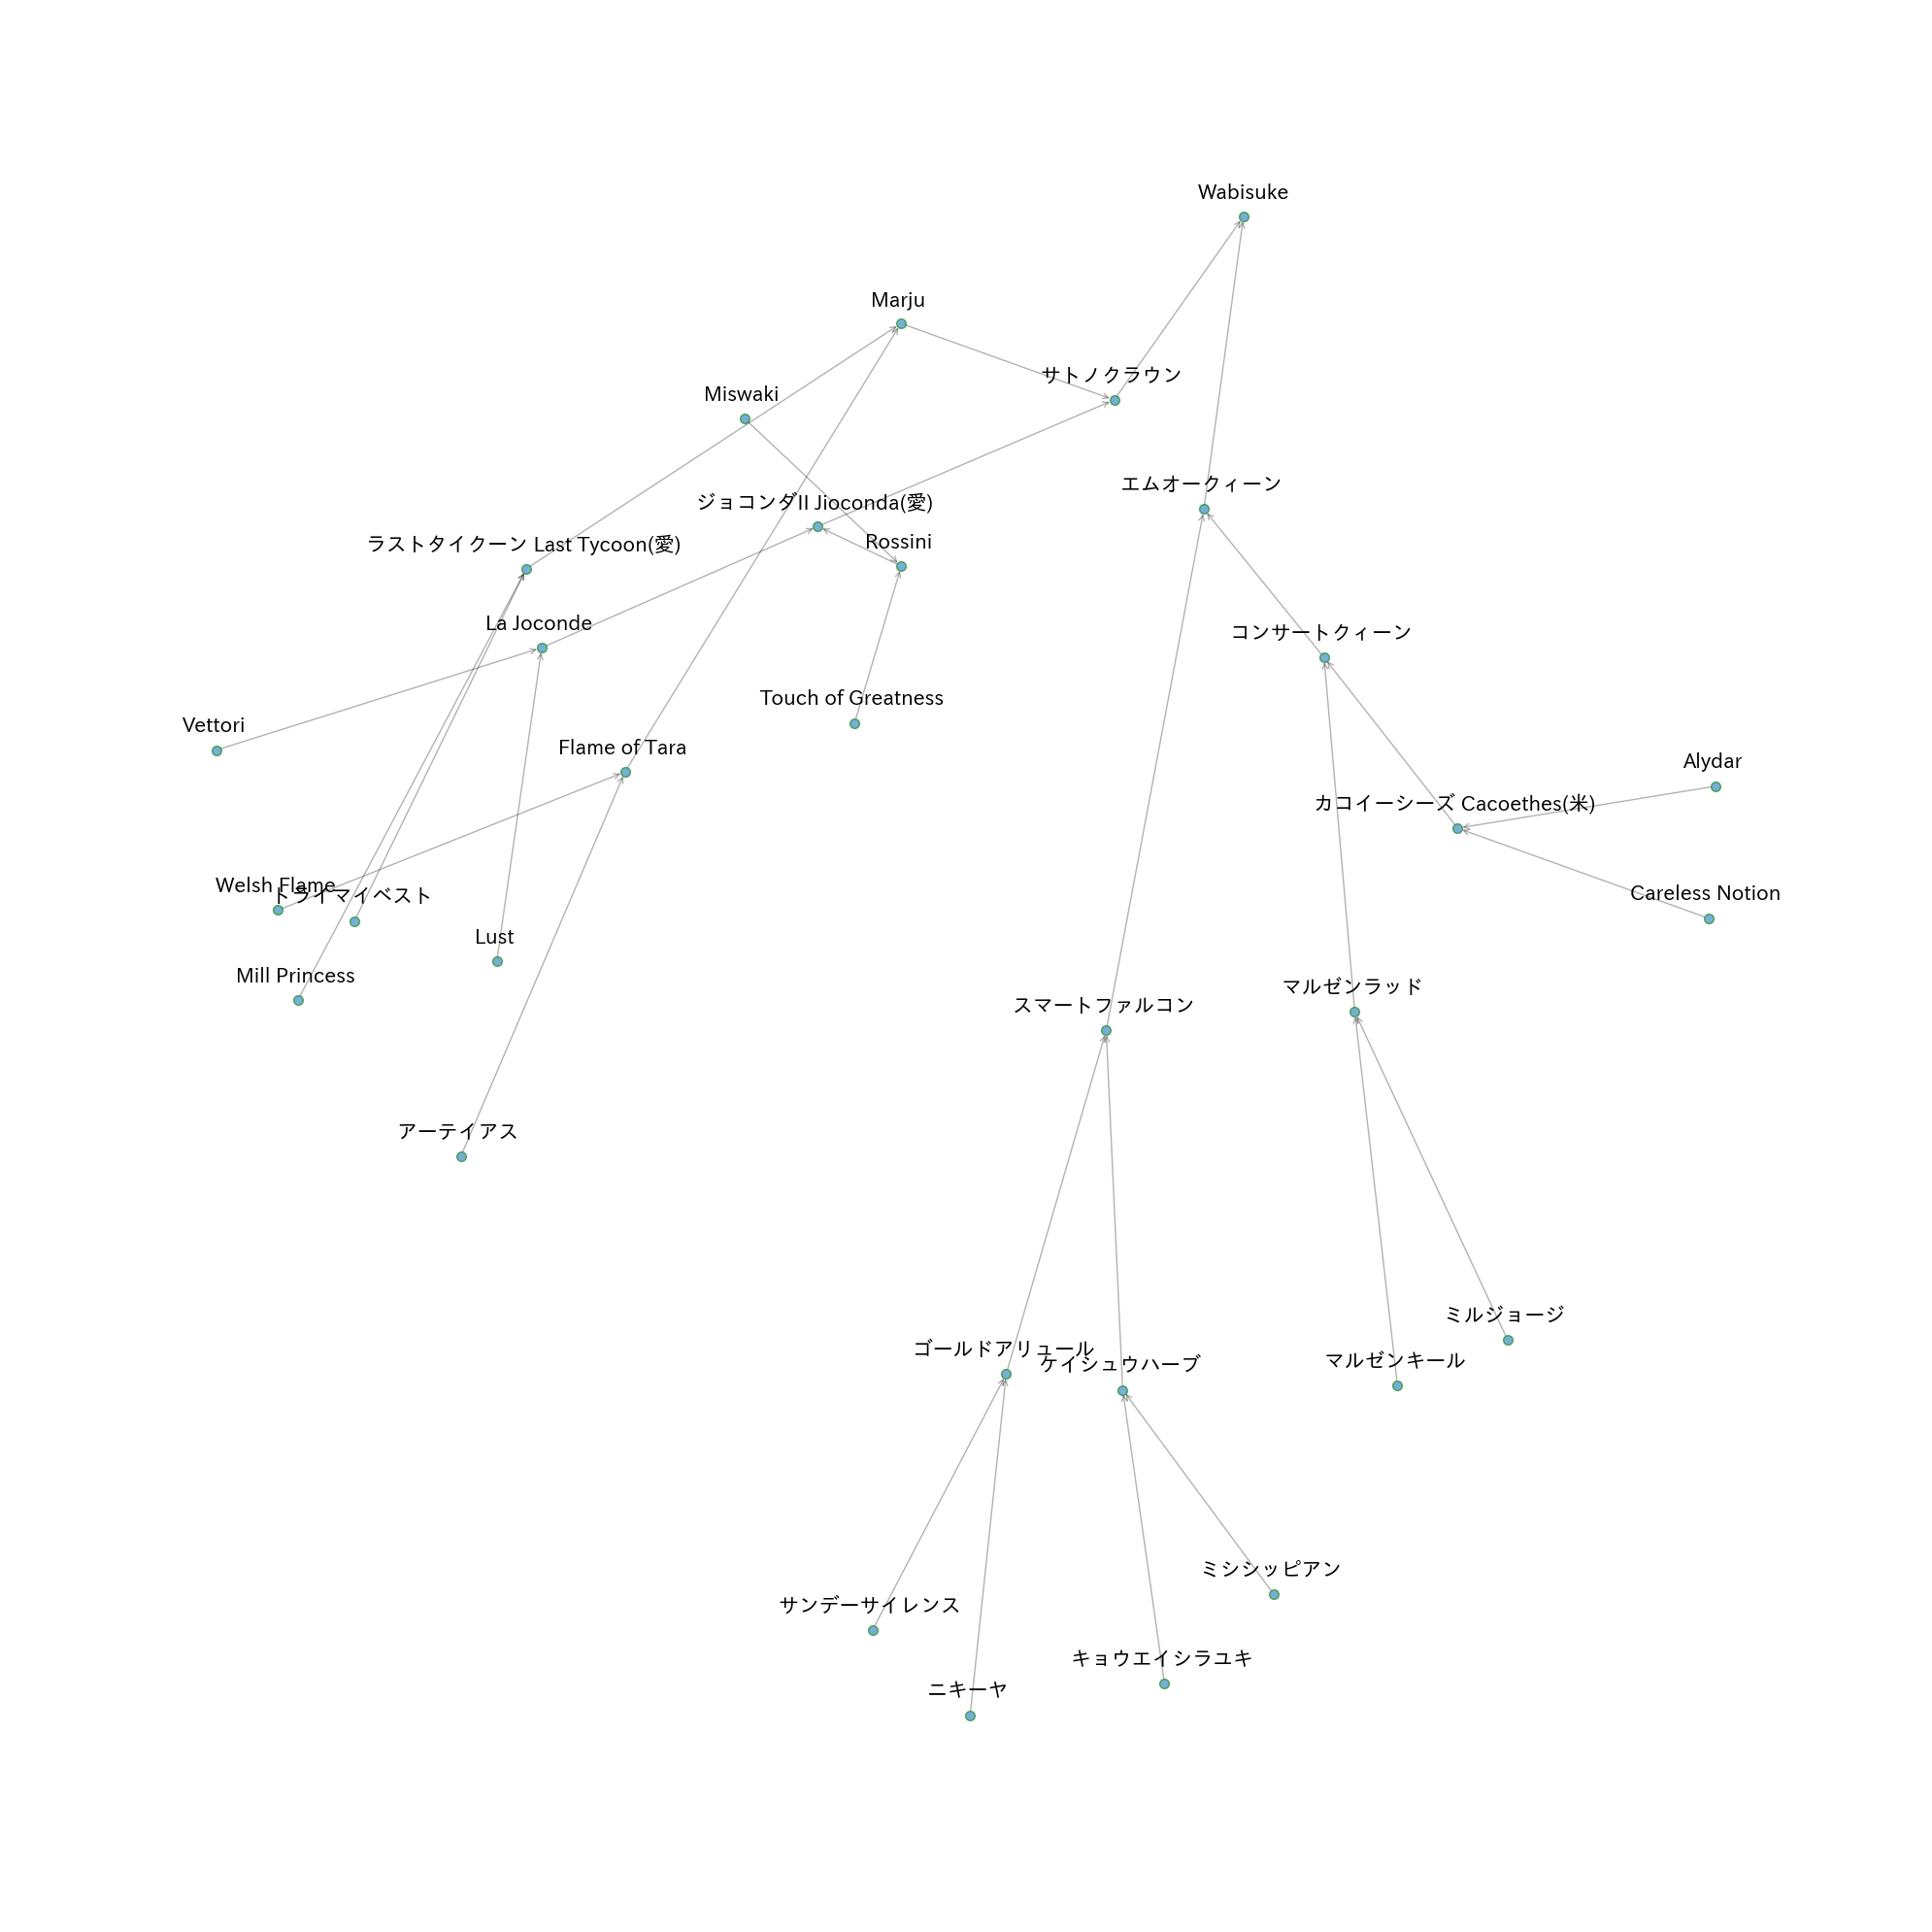

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]

G = nx.from_pandas_edgelist(family_link_df, source = "parent", target = "child", create_using = nx.DiGraph())
seed = 1234
pos = nx.spring_layout(G, seed=seed)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=50, edgecolors = "green", alpha = 0.6)

# edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", node_size = 50, arrowsize = 10, alpha = 0.3)  # using a 10x scale factor here

# labels
pos_higher = {}
y_off = 0.03  # offset on the y axis

for k, v in pos.items():
  pos_higher[k] = (v[0], v[1]+y_off)

nx.draw_networkx_labels(G, pos_higher, font_size=15)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.savefig("sample2.svg", format='svg', dpi=1200)
plt.tight_layout()